## **Proyecto 2 - Productos bancarios**
**Analítica Computacional para la toma de Decisiones**

Grupo: 
1.	Nicolay Esteban Barrera Bayona – 201731399
2.	Daniel Sebastian Caro Ochoa – 202117080


**Roles**
- Nicolay Barrera: Ciencia de datos, Tablero de datos y Despliegue 
- Daniel Caro: Ingeniería de datos, Análisis de datos y Análisis de negocio 

### **1. Exploración de datos**


***


In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Cargar el archivo CSV
data = pd.read_csv('bank-full.csv', sep=';')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general sobre el dataset (tipos de datos y valores nulos)
print("\nInformación general del dataset:")
data.info()

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())

# Verificar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())

# Identificar columnas numéricas y de texto
caracteristicas_numericas = data.select_dtypes(include=[np.number]).columns.to_list()
caracteristicas_texto = data.select_dtypes(include=[object]).columns.to_list()

print("\nCaracterísticas numéricas:\n", caracteristicas_numericas)
print("\nCaracterísticas de texto:\n", caracteristicas_texto)

# Mostrar un análisis de los valores únicos en las columnas de texto
print("\nValores únicos en columnas de texto:")
for col in caracteristicas_texto:
    print(f"{col}: {data[col].nunique()} valores únicos")

# Mostrar los datos faltantes en porcentajes
print("\nPorcentaje de datos faltantes por columna:")
print((data.isnull().sum() / len(data)) * 100)


Primeras filas del dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

### **2. Descripción y Limpieza de Datos**

#### **2.1 Descripción General**
- Número de registros: 45,211.
- Columnas numéricas: Contiene 7 columnas numéricas principales: age, balance, day, duration, campaign, pdays, previous. Estas columnas representan características como la edad, balance en la cuenta, duración de la campaña y contactos previos.
- Columnas categóricas: Existen 10 columnas categóricas: job, marital, education, default, housing, loan, contact, month, poutcome, y y. Estas describen características del cliente, sus preferencias financieras y el resultado de la campaña.
- Valores nulos: No hay valores nulos en ninguna de las columnas.
- Duplicados: No se encontraron registros duplicados en el dataset.


In [7]:
# Verificar duplicados
duplicados = data.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# Identificar valores atípicos usando IQR (Interquartile Range) para las columnas numéricas
Q1 = data[caracteristicas_numericas].quantile(0.25)
Q3 = data[caracteristicas_numericas].quantile(0.75)
IQR = Q3 - Q1
valores_atipicos = ((data[caracteristicas_numericas] < (Q1 - 1.5 * IQR)) | (data[caracteristicas_numericas] > (Q3 + 1.5 * IQR))).sum()

print("\nValores atípicos por columna:")
print(valores_atipicos)

# Verificar tipos de datos
print("\nTipos de datos incorrectos:")
for columna in data.columns:
    if data[columna].dtype == 'object':
        try:
            data[columna].astype(float)
        except:
            print(f"La columna '{columna}' tiene valores no numéricos.")

#Análisis de variables categóricas
cat_feats = data.select_dtypes(include=['object']).columns

# Revisar las categorías únicas y frecuencia de cada variable categórica
for col in cat_feats:
    print(f"\nCategorías únicas en '{col}': {data[col].unique()}")
    print(data[col].value_counts())

profile = ProfileReport(data, title = "Reporte de Datos")
profile.to_notebook_iframe()

Duplicados encontrados: 0

Valores atípicos por columna:
age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64

Tipos de datos incorrectos:
La columna 'job' tiene valores no numéricos.
La columna 'marital' tiene valores no numéricos.
La columna 'education' tiene valores no numéricos.
La columna 'default' tiene valores no numéricos.
La columna 'housing' tiene valores no numéricos.
La columna 'loan' tiene valores no numéricos.
La columna 'contact' tiene valores no numéricos.
La columna 'month' tiene valores no numéricos.
La columna 'poutcome' tiene valores no numéricos.
La columna 'y' tiene valores no numéricos.

Categorías únicas en 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired    

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### **2.2 Transformación sobre los datos** 

In [12]:
# Escalado de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_feats = data.select_dtypes(include=['int64', 'float64']).columns
data[num_feats] = scaler.fit_transform(data[num_feats])

# Comprobamos el resultado de la normalización
print("\nDescripción estadística de variables numéricas normalizadas:\n", data[num_feats].describe())

# Verificación de consistencia en datos categóricos
# Eliminar posibles espacios en blanco y homogeneizar las categorías en minúsculas
for col in cat_feats:
    data[col] = data[col].str.strip().str.lower()

# Revisión de las categorías después del ajuste de consistencia
for col in cat_feats:
    print(f"\nCategorías en '{col}' tras ajuste:\n", data[col].unique())

# Verificar los resultados finales
print("Transformaciones completadas. Vista previa del dataset:")
print(data.head())


Descripción estadística de variables numéricas normalizadas:
                 age       balance           day      duration      campaign  \
count  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04   
mean  -5.029167e-18  1.257292e-17  1.257292e-17 -7.543751e-18  5.029167e-18   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -2.159994e+00 -3.081149e+00 -1.779108e+00 -1.002478e+00 -5.693506e-01   
25%   -7.473845e-01 -4.237719e-01 -9.380027e-01 -6.025167e-01 -5.693506e-01   
50%   -1.823406e-01 -3.002800e-01  2.326031e-02 -3.035165e-01 -2.465603e-01   
75%    6.652252e-01  2.158743e-02  6.240497e-01  2.362370e-01  7.622994e-02   
max    5.091402e+00  3.309478e+01  1.825628e+00  1.809470e+01  1.944365e+01   

              pdays      previous  
count  4.521100e+04  4.521100e+04  
mean   2.011667e-17  9.052501e-17  
std    1.000011e+00  1.000011e+00  
min   -4.114531e-01 -2.519404e-01  
25%   -4.114531e-01 -2.519404e-01  
50%   -4.

### **3. Exploración de datos**

#### **Análisis de distribución de variables numéricas**

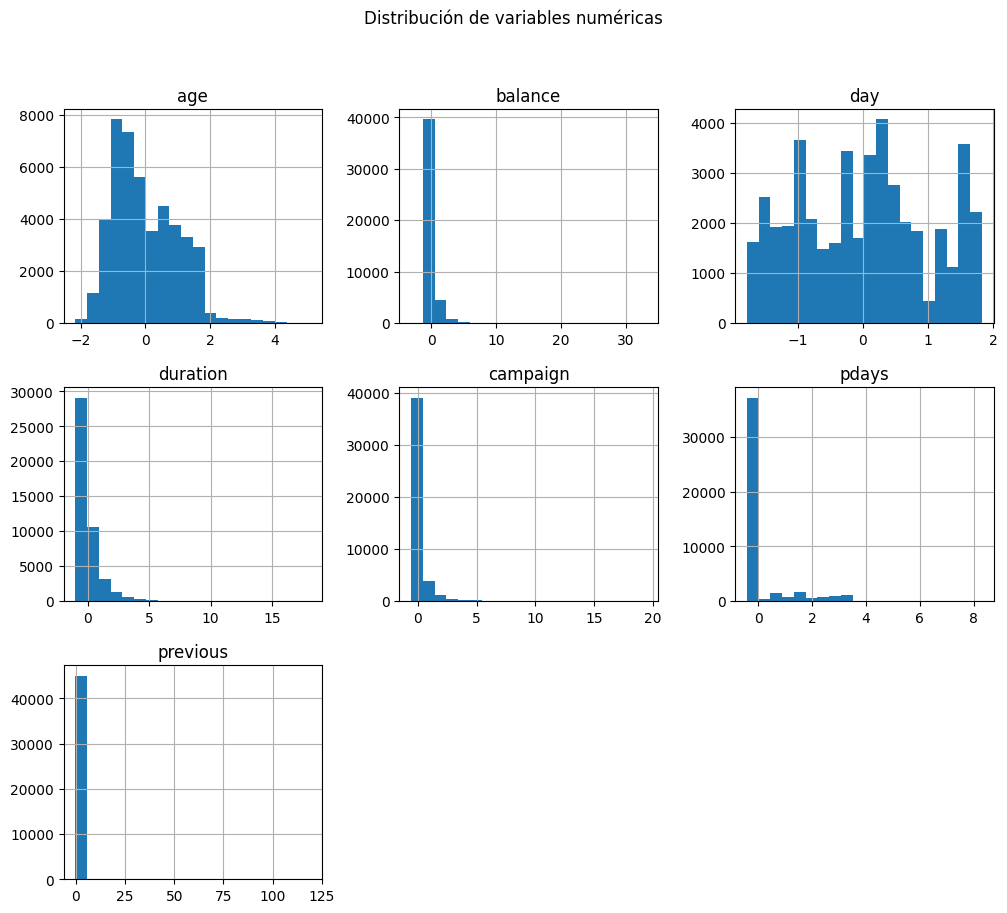

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
num_feats = data.select_dtypes(include=['int64', 'float64']).columns
data[num_feats].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribución de variables numéricas")
plt.show()

#### **Boxplots para detectar valores atípicos**

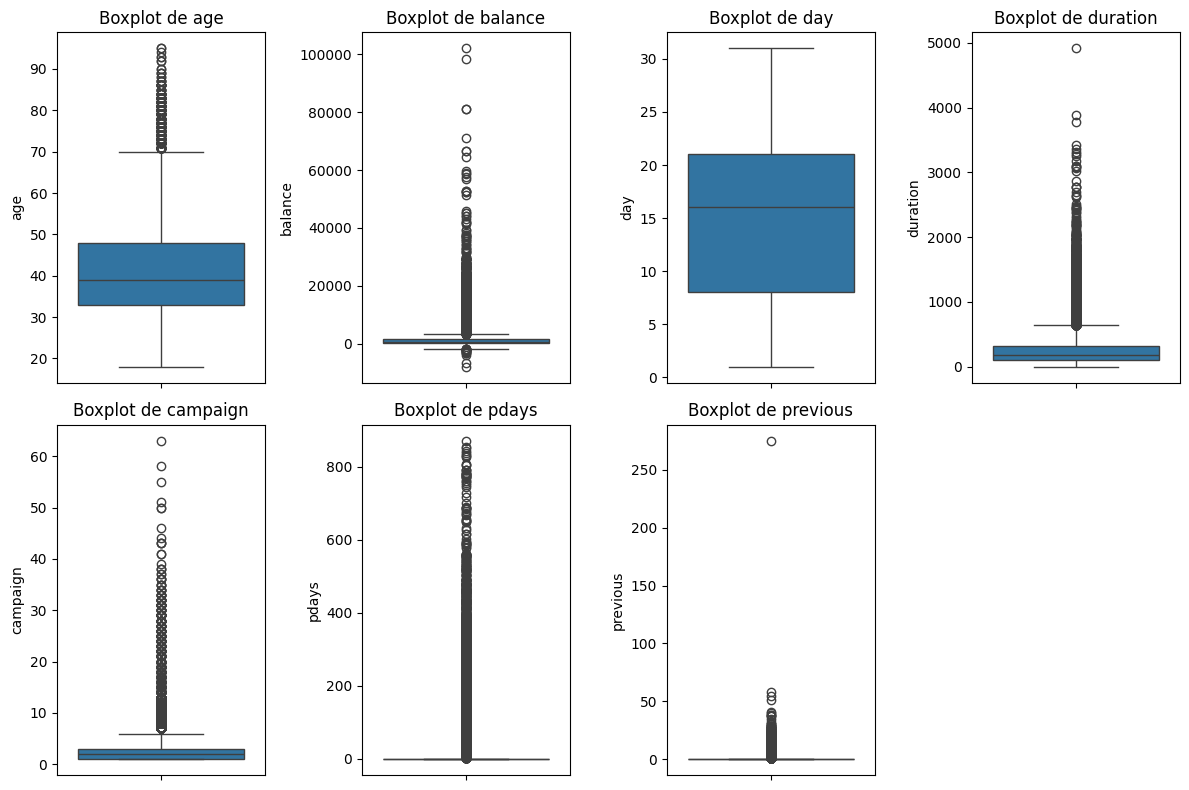

In [6]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_feats, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=data, y=col)
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

#### **Balance de la variable objetivo**

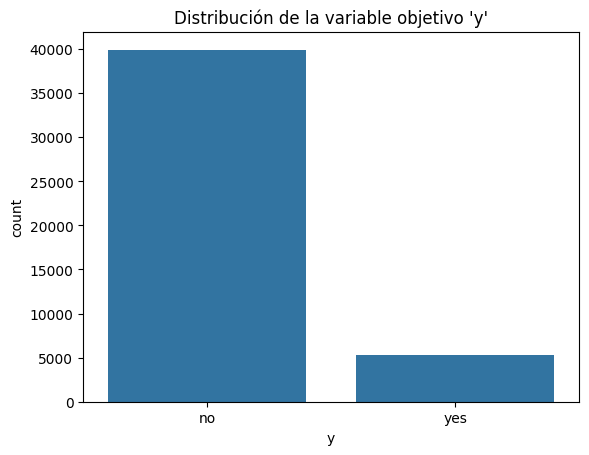

In [8]:
sns.countplot(data=data, x='y')
plt.title("Distribución de la variable objetivo 'y'")
plt.show()

### **4. Modelamiento**

#### **Definir los datos de entrenamiento y prueba**

In [139]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = datos_eps.drop(columns=['actual_productivity', 'date', 'wip'])
y = datos_eps['actual_productivity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_copy = X_test

norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))

#### **Definir la Arquitectura del Modelo de Red Neuronal:**

In [140]:
# Crear el modelo de la red neuronal, incluyendo la capa de normalización
model = tf.keras.models.Sequential([
    norm,  # La capa de normalización va primero
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    tf.keras.layers.Dense(1)  # Capa de salida, una sola neurona para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])



La arquitectura de la red neuronal se compone de una capa de normalización para escalar los datos, seguida de dos capas ocultas con 64 y 32 neuronas, respectivamente, que permiten aprender patrones complejos y refinados en los datos. La capa de salida tiene una sola neurona para predecir la productividad actual, abordando así un problema de regresión. Se utiliza el optimizador Adam para mejorar la convergencia y la pérdida mse para medir el error de las predicciones, complementado con la métrica mae para una evaluación más intuitiva del rendimiento del modelo. Esta configuración busca balancear la complejidad y la eficiencia, permitiendo al modelo generalizar bien sobre los datos.

#### **Entrenamiento y evaluación del modelo:**

In [141]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de prueba (MSE): {test_loss}')
print(f'Error absoluto medio en el conjunto de prueba (MAE): {test_mae}')


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2703 - mae: 0.4044 - val_loss: 0.0645 - val_mae: 0.2086
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0624 - mae: 0.1903 - val_loss: 0.0445 - val_mae: 0.1692
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0416 - mae: 0.1525 - val_loss: 0.0391 - val_mae: 0.1615
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mae: 0.1343 - val_loss: 0.0346 - val_mae: 0.1502
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mae: 0.1339 - val_loss: 0.0321 - val_mae: 0.1432
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mae: 0.1221 - val_loss: 0.0302 - val_mae: 0.1373
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mae: 0.1166 - val_loss: 0.0280 - val_mae: 0.1295
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mae: 0.1134 - val_loss: 0.0283 - val_mae: 0.1327
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

#### **Visualización del Proceso de Entrenamiento:**

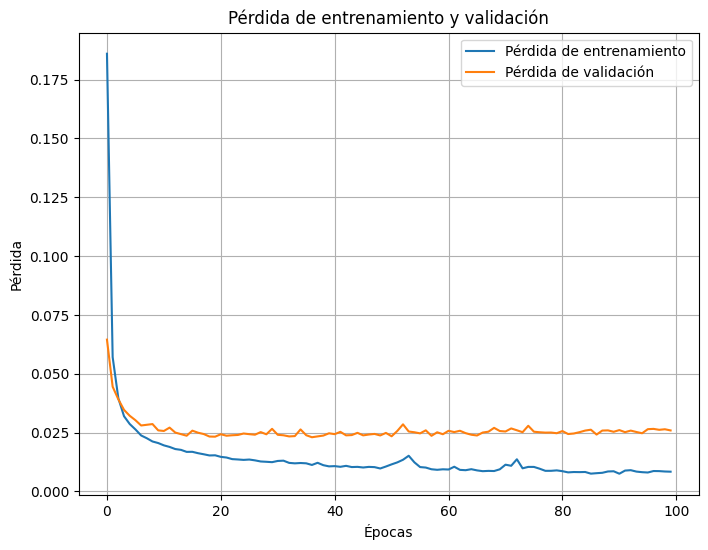

In [142]:
# Extraer los valores de pérdida del historial
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


#### **Verificar predicción del modelo:**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


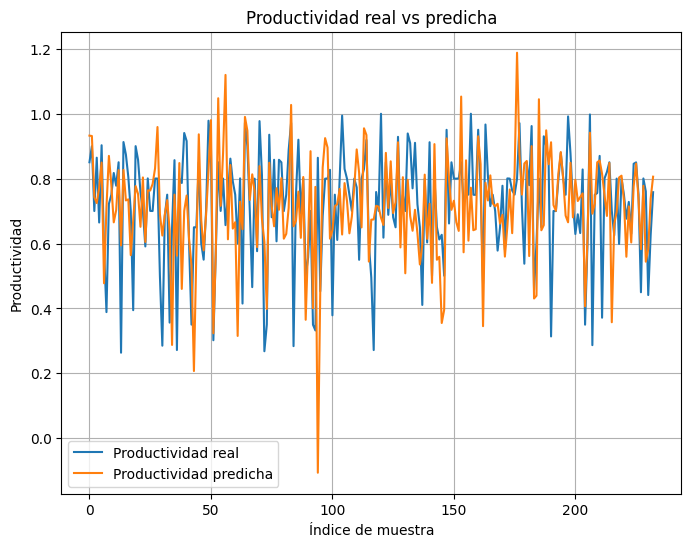

In [143]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Productividad real')
plt.plot(y_pred, label='Productividad predicha')
plt.title('Productividad real vs predicha')
plt.xlabel('Índice de muestra')
plt.ylabel('Productividad')
plt.legend()
plt.grid(True)
plt.show()

En conclusión, el modelo de red neuronal se adapta de manera efectiva a los datos reales, lo que se refleja en su capacidad para predecir la productividad con un alto nivel de precisión. La combinación de capas ocultas y la normalización de los datos han permitido al modelo aprender patrones significativos y complejos, resultando en un rendimiento sólido durante las evaluaciones. Estos resultados indican que el modelo no solo es capaz de generalizar bien, sino que también puede considerarse como una herramienta confiable para la predicción de la productividad en el contexto analizado.

### **5. Análisis de negocio**
**¿Pregunta?**